# Deep Learning 2019
## Assignment 1 - Machine Learning Basics
Please complete the questions below by modifying this notebook and send this file via e-mail to

__[pir-assignments@l3s.de](mailto:pir-assignments@l3s.de?subject=[DL-2019]%20Assignment%20X%20[Name]%20[Mat.%20No.]&)__

using the subject __[DL-2019] Assignment X [Name] [Mat. No.]__. The deadline for this assignment is __April 30th, 2019, 9AM__.

Programming assignments have to be completed using Python 3. __Please do not use Python 2.__

__Always explain your answers__ (do not just write 'yes' or 'no').

Please add your name and matriculation number below:

__Name:__
<br>
__Mat. No.:__

----

### 1. Bias-Variance Tradeoff

You have a dataset of $1000$ instances that is divided into a Train-Dev-Test set $(60\%-20\%-20\%)$. The bayes error (or human performance) is $5\%$. 

1. If the training error is $1\%$ and the dev error is $10\%$, is it a bias or a variance problem?

2. If the training error is $10\%$ and the dev error is $10\%$, is it a bias or a variance problem?

3. If the training error is $10\%$ and the dev error is $6\%$, is it a bias or a variance problem?

4. If the training set and dev set are differently distributed, what can you expect? 

5. Is it acceptable to have different dev and test distributions? Why?

6. Is it acceptable to have different distribution of training data from dev and test (Dev and test set have the same distribution)? Why?

#### Solution
1. Obtaining training error less than dev error as well as bayes error is a clear case of overfitting to training data. Such a model has low bias and high variance.

2. Having equal training and dev error and a lower bayes error indicates the problem of underfitting. In such a case there is high bias (underfitting) and low variance (no change between training and dev error).

3. Such a case with training error larger than bayes error but dev error close to bayes error indicates difference between distributions of training and dev sets. A larger difference between training error and dev error indicates high bias (underfitting) and high variance (difference between dev and training error).

4. Training and dev error can differ considerably.

5. No, because the purpose of setting up the dev set is to depict the ability of generalization of the model during training in advance. Therefore the distributions of dev data (used as kind of a component of training process) and test data (basically corresponds the 'real world') should be similar.

6. No. High difference between distributions of training and dev (test) sets can cause both bias and variance problem. After all we don't want to train a data on a way too deviant training set from the real world (dev and test sets)

### 2. Dev-Test Splits
If your dataset has $10^6$ instances and the bayes error is $5\%$, 
1. are dev and test splits of $1\%$ acceptable, if the bayes error on both dev and test is $5\%$?
2. are dev and test splits of $1\%$ acceptable, if the bayes error on both dev and test splits is $15\%$?

#### Solution

1. Yes, because in this case dev and test set are from the same distribution as the training set. In this case the bayes error on the training set will also be $5\%$.

2. No, because the dev and test splits now follow a different distribution. The traing and dev sets have a higher percentage of (bad) examples leading to human error than that in the training set. In this case the bayes error on training set will be $4.79\%$.

### 3. Sum of Squares Loss
Given a polynomial function of the form
\begin{equation} 
    f(x, {\bf{w}}) = \sum_{j=0}^M w_j x^j.
\end{equation}
We are given a training set comprising $N$ observations of $x$, given by $x_1, x_2, ..., x_n$, together with the corresponding observations of target values $y_1, y_2, ..., y_n$.

We would like to fit the data to the polynomial function, $f(x, {\bf{w}})$ by minimizing the following loss function:
\begin{equation} 
    E({\bf{w}}) = {1 \over 2}\sum_{n=1}^N (f(x_n, {\bf{w}}) - y_n)^2.
\end{equation}
Show that the coefficients ${\bf{w}} = \{w_i\}$ that minimize the above loss function are given by the solution to the following set of linear equations:
\begin{equation} 
    \sum_{j=0}^M A_{ij} w_j = Y_i
\end{equation}
where
\begin{equation} 
    A_{ij} = \sum_{n=1}^N (x_n)^{i+j} \text{ and } Y_i =\sum_{n=1}^N (x_n)^i y_n.
\end{equation}

#### Solution

Equating the partial derivative of $E({\bf{w}})$ with respect to each $w_i$ to $0$ we obtain
\begin{equation}
    \sum_{n=1}^N (f(x_n, {\bf{w}}) - y_n) \cdot {\partial f(x_n, {\bf{w}}) \over \partial {w_i}} = 0\\
    \implies \sum_{n=1}^N \left(\sum_{j=0}^M w_j (x_n)^j - y_n\right)(x_n)^i = 0.
\end{equation}
Rearranging the terms we obtain
\begin{equation}
    \sum_{j=0}^M \sum_{n=1}^N (x_n)^{i+j} w_j = \sum_{n=1}^N (x_n)^i y_n.
\end{equation}

### 4. Linear Regression
Implement a simple linear regression with __Numpy__ to fit a line, $h(x) = w_1 + w_2 x$,  to a set of points generated using the `generate_data` function as defined below. In particular, find $w_1$ and $w_2$ such that the sum of squares error, $\sum_i ||h(x_i) - y_i||^2$, is minimized. 

In [1]:
from matplotlib import pyplot
import numpy as np


def generate_data(f, spread, x_start, x_end, delta=1):
    """Generate a number of data points from f with some spread."""
    x = np.asarray(np.arange(x_start, x_end, delta))
    y = f(x) + (np.random.rand(*x.shape) - 0.5) * spread
    return x, y


def lin_reg(x, y):
    """
    Return the exact linear regression line, i.e. the weights which minimize the loss.

    Input values:
        * x = [x_1, ..., x_n]: the x-values of the data points
        * y = [y_1, ..., y_n]: the y-values of the data points

    Return w = (w_1, w_2) such that w_1 is the bias and w_2 is the slope, i.e. h(x) = w_1 + w_2 * x.
    """
    # TODO
    return 0, 0


# generate some points
f = lambda x: 2 + 3 * x
x, y = generate_data(f, spread=5, x_start=0, x_end=10, delta=0.05)

# plot the points
pyplot.plot(x, y, marker='.', linewidth=0)

# plot f
pyplot.plot(x, f(x), linewidth=3)

# perform linear regression
w = lin_reg(x, y)

# plot the regression line
pyplot.plot(x, w[0] + w[1] * x, linewidth=3)

pyplot.show()

<Figure size 640x480 with 1 Axes>

#### Solution

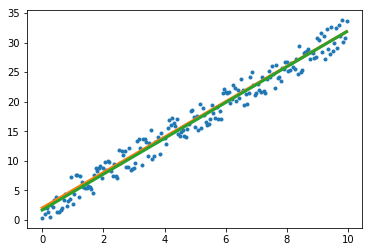

In [2]:
def generate_data(f, spread, x_start, x_end, delta=1):
    """Generate a number of data points from f with some spread."""
    x = np.asarray(np.arange(x_start, x_end, delta))
    y = f(x) + (np.random.rand(*x.shape) - 0.5) * spread
    return x, y


def lin_reg(x, y):
    """
    Return the exact linear regression line, i.e. the weights which minimize the loss.

    Input values:
        * x = [x_1, ..., x_n]: the x-values of the data points
        * y = [y_1, ..., y_n]: the y-values of the data points

    Return w = (w_1, w_2) such that w_1 is the bias and w_2 is the slope, i.e. h(x) = w_1 + w_2 * x.
    """
    # change the shape of x from (n,) to (n, 2), where n is the number of points
    X = np.expand_dims(x, axis=1)
    ones = np.full_like(X, 1)
    X = np.append(ones, X, axis=1)
    # X is now of the form [[1, x_1], ..., [1, x_n]]
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w
    

# generate some points
f = lambda x: 2 + 3 * x
x, y = generate_data(f, spread=5, x_start=0, x_end=10, delta=0.05)

# plot the points
pyplot.plot(x, y, marker='.', linewidth=0)

# plot f
pyplot.plot(x, f(x), linewidth=3)

# perform linear regression
w = lin_reg(x, y)

# plot the regression line
pyplot.plot(x, w[0] + w[1] * x, linewidth=3)

pyplot.show()

### 5. Maximum Likelihood Estimation (MLE)

Suppose we have a stochastic system in which events of interest occur independently with small and constant probability, i.e., the events are independently and identically distributed (i.i.d.). Such a process is called a Poisson process. 

The time intervals or delays between individual events in a Poisson process follow an exponential distribution with parameter $\lambda$ as follows 

\begin{equation}
\Pr(x)=\begin{cases}
  \lambda e^{-\lambda x} & x \geq 0\\
  0 & x<0
\end{cases},
\end{equation}

Now, let $\{x_i\} = \{x_1, x_2, . . . , x_n\}$ denote our observed time interval data. 

1. What is the log likelihood of this data under the exponential model $\Pr(x)$?

2. Derive an analytical form for $\lambda$ which maximizes the likelihood of our observed data.

3. Implement the maximum likehood estimator, i.e. compute $\lambda$ for the following observed time intervals.


$$\{x_1, x_2, ..., x_n\} = \{0.08817335, 0.7699288, 1.37257133, 1.07451531, 0.02959294, 0.16400137, 0.12498293, 0.56801231, 0.23876629, 0.80438577\}$$

In [3]:
import numpy as np


def exponential_mle(data):
    """
    This function estimate the parameter lambda of the exponential
    distribution from the input data using maximum likelihood 
    estimation (MLE). The PDF of the distribution is defined as:
    
    f(x; lambda) = lambda * exp(-lambda * x) if x >= 0 else 0
    
    Parameter
    ---
    data: array-like input data, indicating the time intervals between
          events
          
    Returns
    ---
    lambda: the parameter estimated using MLE
    """
    #TODO
    return 0


intervals = [0.08817335, 0.7699288 , 1.37257133, 1.07451531, 0.02959294,
             0.16400137, 0.12498293, 0.56801231, 0.23876629, 0.80438577]
print("{:0.4f}".format(exponential_mle(intervals)))

0.0000


#### Solution

1. 
$$
\mathcal{L}(X; \lambda) = \log \prod_{i=1}^n\Pr(x_i) = \sum_{i=1}^n\log \lambda e^{-\lambda x_i} = n\log\lambda - \lambda\sum_{i=1}^n x_i $$
2. In order to find the value of $\lambda$ which maximizes $\mathcal{L}$ we compute its derivative with respect to $\lambda$ and set it to $0$,
$$
\frac{\partial}{\partial\lambda}\mathcal{L}(x_i; \lambda) = \frac{n}{\lambda}-\sum_{i=1}^n x_i
$$
and obtain $\hat\lambda = {n\over \sum_{i=1}^n x_i} .$
3. 

In [4]:
import numpy as np


def exponential_mle(data):
    """
    This function estimate the parameter lambda of the exponential
    distribution from the input data using maximum likelihood 
    estimation (MLE). The CDF of the distribution is defined as:
    
    f(x; lambda) = lambda * exp(-lambda * x) if x >= 0 else 0
    
    Parameter
    ---
    data: array-like input data, indicating the time intervals between
          events
          
    Returns
    ---
    lambda: the parameter estimated using MLE
    """
    if not isinstance(data, np.ndarray):
        data = np.array(data)
    return len(data) / sum(data)


intervals = [0.08817335, 0.7699288 , 1.37257133, 1.07451531, 0.02959294,
             0.16400137, 0.12498293, 0.56801231, 0.23876629, 0.80438577]
print("{:0.4f}".format(exponential_mle(intervals)))

1.9102
